## Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read a csv file as pandas dataframe

In [65]:
df=pd.read_csv("toyota.csv")


display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


## Explenation of Columns Name:
#### model=Model of the Toyota cars
#### year=Manufacturing year of the car
#### price=Price of the car
#### transmission=Transmission type of the car
#### mileage=Summation of total mile of the car traveled 
#### fuelType=Type of the fuel the car use
#### mpg=Miles per Gallon means travel distance by miles for one gallon of fuel
#### engineSize=Engine size is the volume of fuel and air that can be pushed through a car's cylinders

In [66]:
# Check for missing values,datatypes of the columns
# df.info()

## Create Function to find number of observation for unique column of a data frame

In [67]:

def unique_percent_count(data,col):
    
    col_count =data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)
    col_count =col_count.reset_index()
    col_count = col_count.rename(columns={'index':col, col:'percent of cars'})
    col_count['percent of cars'] = col_count['percent of cars']*100
    col_count['percent of cars'] = np.round(col_count['percent of cars'],2)

    return col_count

In [68]:
fuelType_count = unique_percent_count(df, 'fuelType')
transmission_count = unique_percent_count(df, 'transmission')
model_count = unique_percent_count(df, 'model')

year_count = unique_percent_count(df, 'year')
year_count = year_count.sort_values(by='year')



## Create a function to show the number of observations for each unique value in a column using a bar plot

In [69]:
def barplot(data,x_col,y_col,color,yticks,rotation):
    sns.barplot(x=x_col,y=y_col,data=data,color=color)
    plt.title('Percent of cars present for each '+x_col)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)


## Barplot 

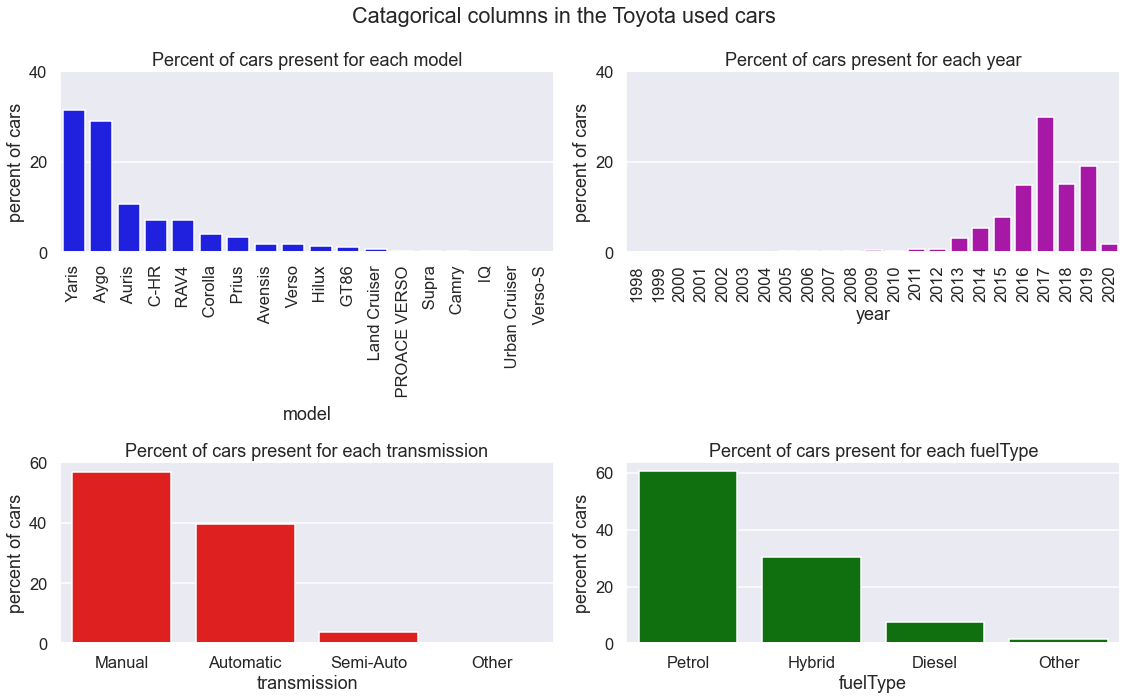

In [70]:
sns.set_context('talk')
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
barplot(model_count,'model','percent of cars','blue',(np.arange(0,41,20)),90)

plt.subplot(2,2,2)
barplot(year_count,'year','percent of cars','m',(np.arange(0,41,20)),90)

plt.subplot(2,2,3)
barplot(transmission_count,'transmission','percent of cars','red',(np.arange(0,61,20)),0)


plt.subplot(2,2,4)
barplot(fuelType_count,'fuelType','percent of cars','green',(np.arange(0,61,20)),0)


plt.suptitle("Catagorical columns in the Toyota used cars")
plt.tight_layout()
plt.show()

## Scatterplot using Seaborn

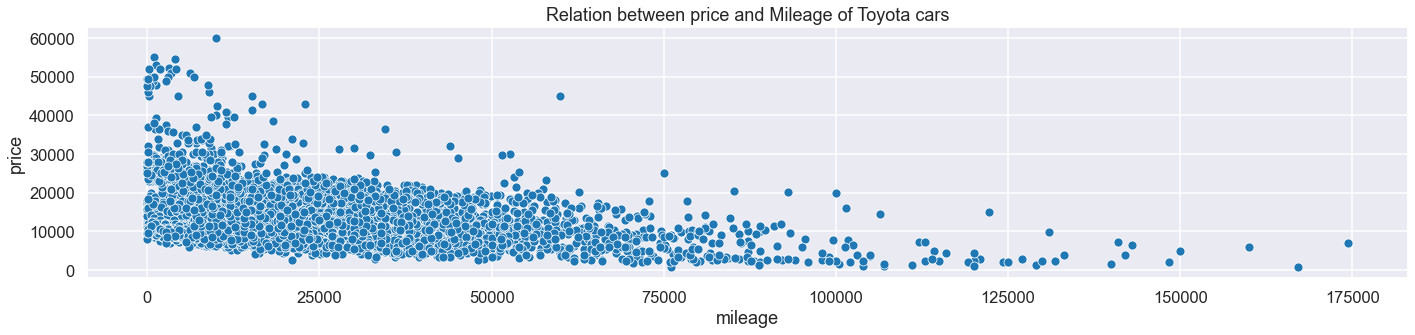

In [71]:
plt.figure(figsize=(20,5))
sns.set_context('talk')

plt.subplot(1,1,1)
sns.scatterplot(x='mileage',y='price',data=df)
plt.title('Relation between price and Mileage of Toyota cars')


plt.tight_layout()
plt.show()

#### From the figure it can be seen that the price of the cars are decreasing with the increase in the value of mileage.It can be explain practically because if a car's have a greater mileage it represent that it runs for a long time thus it will decrease it's salvage value.

## Scatterplot with Hue by using Seaborn

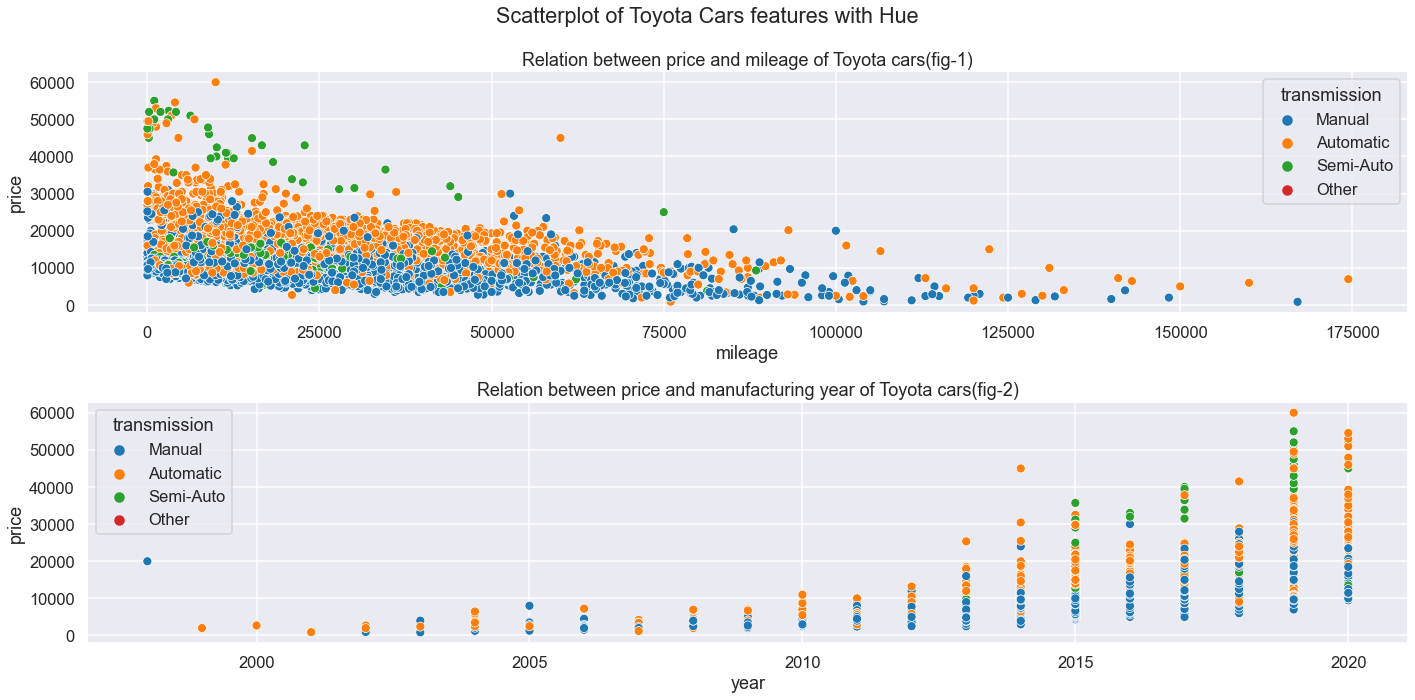

In [72]:
plt.figure(figsize=(20,10))
sns.set_context('talk')

plt.subplot(2,1,1)
sns.scatterplot(x='mileage',y='price',data=df,hue='transmission')
plt.title('Relation between price and mileage of Toyota cars(fig-1)')


plt.subplot(2,1,2)
sns.scatterplot(x='year',y='price',data=df,hue='transmission')
plt.title('Relation between price and manufacturing year of Toyota cars(fig-2)')


plt.suptitle('Scatterplot of Toyota Cars features with Hue')
plt.tight_layout()
plt.show()

## Observation from Scatterplot of Toyota Cars features with Hue

### Relation between price and mileage of Toyota cars(fig-1),
#### price of the cars is decreasing with the increase of mileage also if we see the order of prices for different transmission type from high to low semi-Auto>Automatic>Manual also Other transmission is not visible because of too less amount of cars have other transmission.
### Relation between price and production year of Toyota cars(fig-2),
#### price of the cars is increasing with the increase in manufacturing year because newer model cost greater.Also it can be seen that for the same year the price also depends on the transmission type in the order of Semi-Auto>Automatic>Manual. 

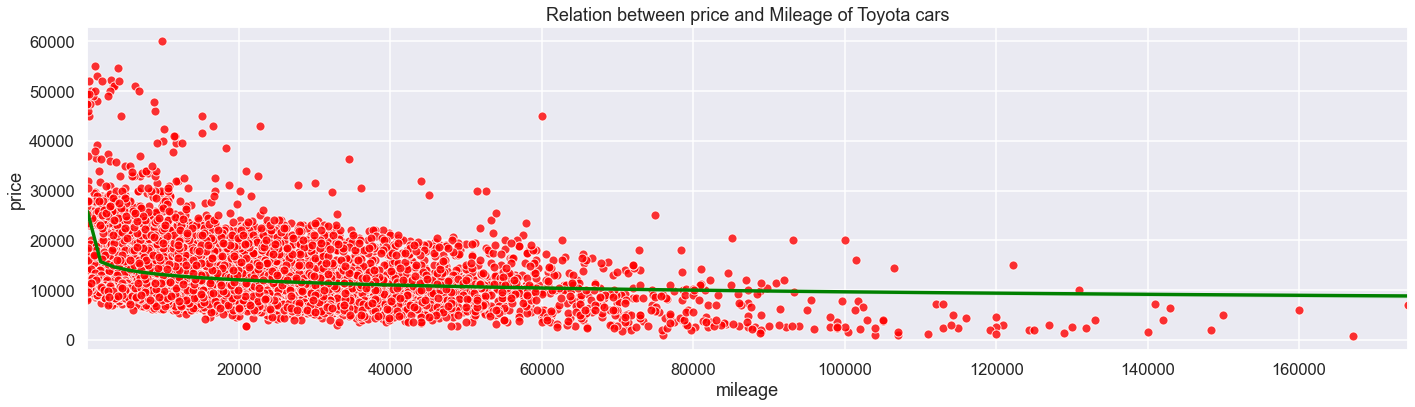

In [73]:
plt.figure(figsize=(20,6))
sns.set_context('talk')
plt.subplot(1,1,1)
sns.regplot(x='mileage',y='price',data=df,line_kws={'color':'green'},
            scatter_kws={'color':'r','edgecolor':'white'},logx=1)


plt.title('Relation between price and Mileage of Toyota cars')
plt.tight_layout()

plt.show()

### Observation from Relation between price and Mileage of Toyota cars with trend line
#### From the figure it can be seen that the price of the cars are decreasing  linearly with increasing the value of mileage value except the mileage range 0-5k where the relation is exponetial between price and mileage.

In [74]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


## Histogram using Seaborn

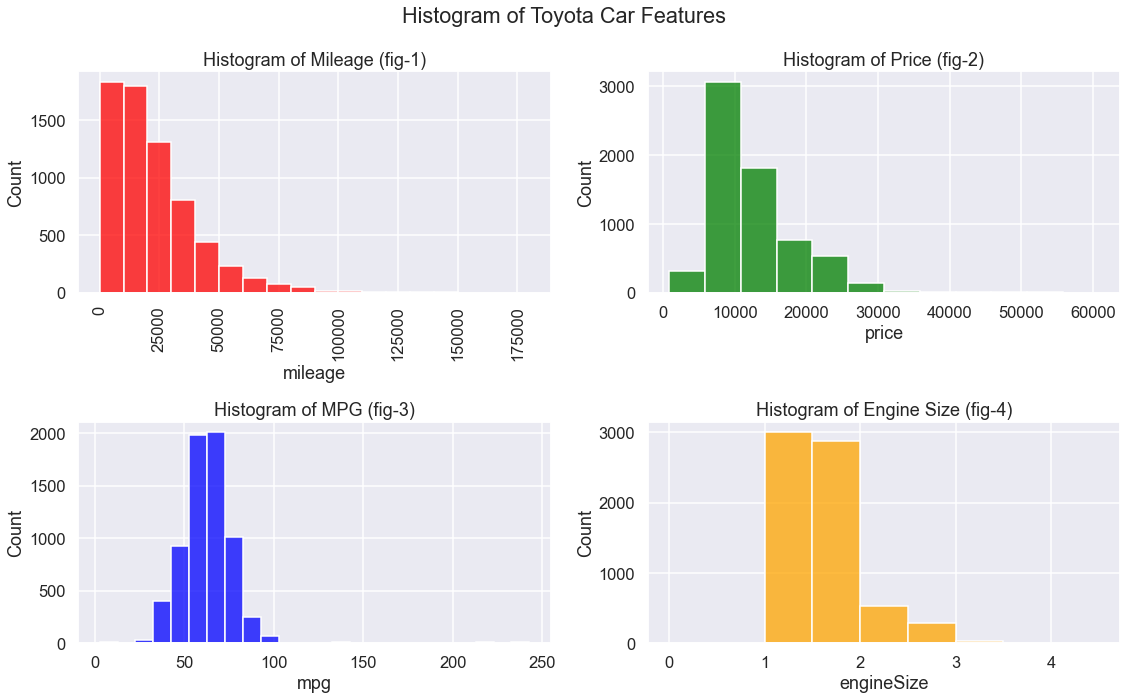

In [75]:
plt.figure(figsize=(16,10))
sns.set_context('talk')

plt.subplot(2,2,1)
sns.histplot(data=df,x='mileage',binwidth=10000,color='red')
plt.xticks(rotation=90)
plt.title('Histogram of Mileage (fig-1)')

plt.subplot(2,2,2)
sns.histplot(data=df,x='price',binwidth=5000,color='green')
plt.title('Histogram of Price (fig-2)')

plt.subplot(2,2,3)
sns.histplot(data=df,x='mpg',binwidth=10,color='blue')
plt.title('Histogram of MPG (fig-3)')

plt.subplot(2,2,4)
sns.histplot(data=df,x='engineSize',binwidth=0.5,color='orange')
plt.title('Histogram of Engine Size (fig-4)')

plt.suptitle('Histogram of Toyota Car Features')
plt.tight_layout()
plt.show()

## Observation from Histogram
#### Histogram of Mileage (fig-1):Skew Right.Maximum mileage of cars in the range of 0-10k.
#### Histogram of Price (fig-2):Skew Right.Maximum price of cars in the range of 5550-10550.
#### Histogram of MPG (fig-3):Unimodal.Maximum MPG in the range of 65-75.
#### Histogram of Engine Size (fig-4):Skew Right.Maximum Engine size is in the range of 1-1.5.


## Distribution Plot of Toyota Car Features

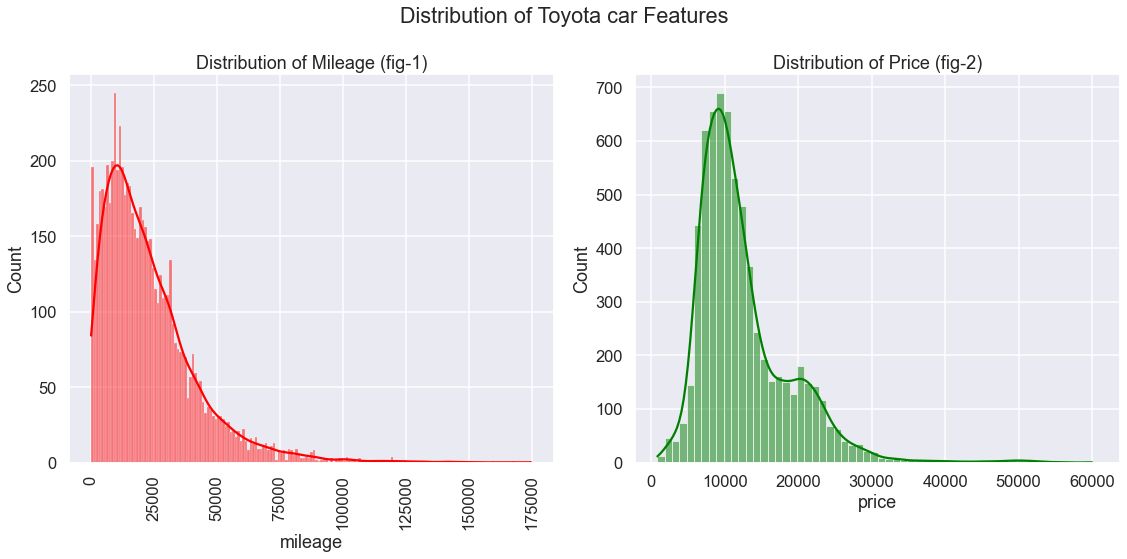

In [76]:
plt.figure(figsize=(16,8))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.histplot(data=df,x='mileage',binwidth=1000,color='red',kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of Mileage (fig-1)')
plt.subplot(1,2,2)
sns.histplot(data=df,x='price',binwidth=1000,color='green',kde=True)
plt.title('Distribution of Price (fig-2)')


plt.suptitle('Distribution of Toyota car Features')
plt.tight_layout()
plt.show()

## Observation from the Distribution Plot
### Distribution of Mileage (fig-1):Positive Skew.
### Distribution of Price (fig-2):Symmetrical Distribution.

## ECDF of Toyota car Features

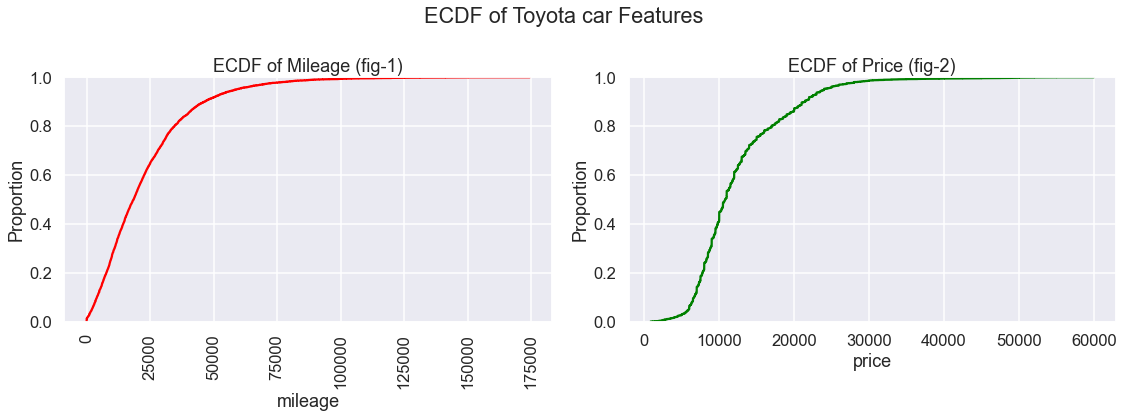

In [77]:
plt.figure(figsize=(16,6))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.ecdfplot(data=df, x="mileage",color='red')
plt.xticks(rotation=90)
plt.title('ECDF of Mileage (fig-1)')


plt.subplot(1,2,2)
sns.ecdfplot(data=df, x="price",color='green')
plt.title('ECDF of Price (fig-2)')


plt.suptitle('ECDF of Toyota car Features')
plt.tight_layout()
plt.show()

## Observation from ECDF
### ECDF of Mileage (fig-1):About 95% of the cars mileage is approximately equal or less than 75k.
### ECDF of Price (fig-2):About 96% of the cars price is approximately equal or less than 30k.


## Boxplot using Seaborn


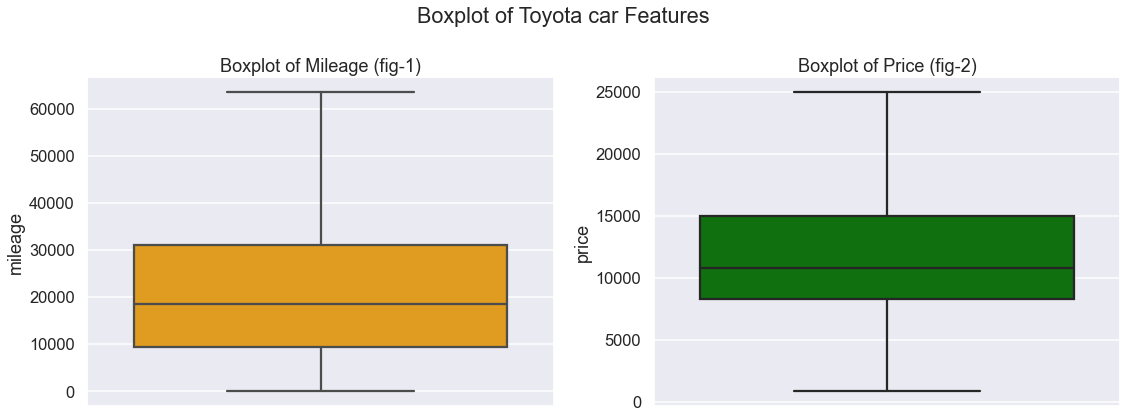

In [78]:
plt.figure(figsize=(16,6))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.boxplot(y='mileage', data=df, showfliers=False, color='orange')
plt.title('Boxplot of Mileage (fig-1)')

plt.subplot(1,2,2)
sns.boxplot(y='price', data=df, showfliers=False, color='green')
plt.title('Boxplot of Price (fig-2)')


plt.suptitle('Boxplot of Toyota car Features')
plt.tight_layout()
plt.show()

## Observation from Boxplot of Toyota car Features
### Boxplot of Mileage (fig-1) :Median mileage is about 18k,25% cars have mileage which is equal or lower than about 10k,75% cars have mileage which is equal or less than 30k.
### Boxplot of Price (fig-2) : Median price is about 11k,25% cars have price which is equal or lower than about 8k,75% cars have mileage which is equal or less than 15k,Price range for toyota used cars are 0-25k.

## Boxplot of Toyota car Features with categorical column as x-axis

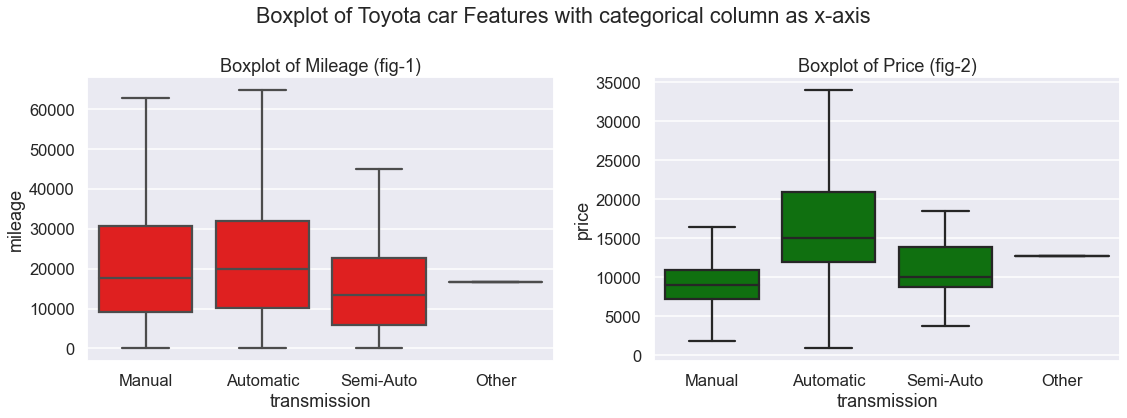

In [79]:
plt.figure(figsize=(16,6))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.boxplot(x='transmission',y='mileage', data=df, showfliers=False, color='red')
plt.title('Boxplot of Mileage (fig-1)')

plt.subplot(1,2,2)
sns.boxplot(x='transmission',y='price', data=df, showfliers=False, color='green')
plt.title('Boxplot of Price (fig-2)')


plt.suptitle('Boxplot of Toyota car Features with categorical column as x-axis')
plt.tight_layout()
plt.show()

## Observation from Boxplot of Toyota car Features with categorical column as x-axis
### Boxplot of Mileage (fig-1) :Among all transmission type median mileage is greater for Automatic cars and lowest for Semi-Auto cars.
### Boxplot of Price (fig-2) : Among all transmission type median price is greater for Automatic cars and lowest for Manual cars.

## Violinplot of Toyota car Features using Seaborn

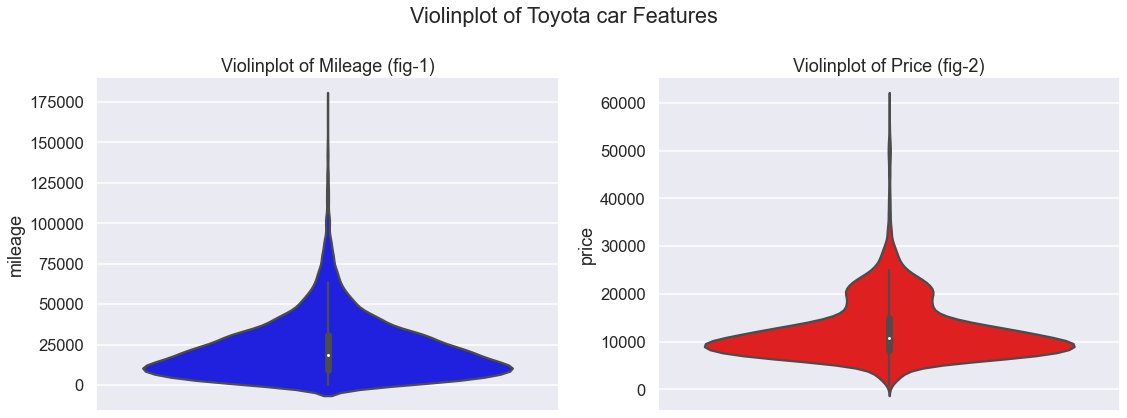

In [80]:
plt.figure(figsize=(16,6))
sns.set_context('talk')

plt.subplot(1,2,1)
sns.violinplot(y='mileage', data=df, showfliers=False, color='blue')
plt.title('Violinplot of Mileage (fig-1)')

plt.subplot(1,2,2)
sns.violinplot(y='price', data=df, showfliers=False, color='red')
plt.title('Violinplot of Price (fig-2)')


plt.suptitle('Violinplot of Toyota car Features')
plt.tight_layout()
plt.show()

## Observation from Violinplot of Toyota car Features
### Violinplot of Mileage (fig-1) :Most of the cars have mileage ranges between 0-100k.
### Violinplot of Price (fig-2) :Most of the cars have price ranges between 0-35k.

### Data Aggregation

In [81]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)


,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011
Corolla,267,20942.734082,5591710
GT86,73,19908.849315,1453346
Hilux,86,21504.593023,1849395
IQ,8,4247.250000,33978


,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


,count,mean,sum
fuelType,,,
Diesel,503,15697.807157,7895997
Hybrid,2043,17185.472834,35109921
Other,105,14121.161905,1482722
Petrol,4087,9759.537803,39887231


### Data Preprocessing

In [82]:
#sorting the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

#creating a new column percentage of the cars in each model/transmission/fuelType
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

#converting the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/(1000000)
df_agg_transmission['sum'] = df_agg_transmission['sum']/(1000000)
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/(1000000)

#rounding to two decimal points
df_agg_model = df_agg_model.round(2)
df_agg_transmission = df_agg_transmission.round(2)
df_agg_fuelType = df_agg_fuelType.round(2)

#removing the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)
df_agg_transmission = df_agg_transmission.drop('count', axis=1)
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_model.head())
display(df_agg_transmission.head())
display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


,mean,sum,percent_of_cars
transmission,,,
Manual,9551.50,36.54,56.78
Automatic,16582.83,44.06,39.43
Semi-Auto,14797.14,3.76,3.77
Other,12795.00,0.01,0.01


,mean,sum,percent_of_cars
fuelType,,,
Petrol,9759.54,39.89,60.66
Hybrid,17185.47,35.11,30.32
Diesel,15697.81,7.90,7.47
Other,14121.16,1.48,1.56


### Barplot for percentages of the cars,Average and Total selling price of the cars by model


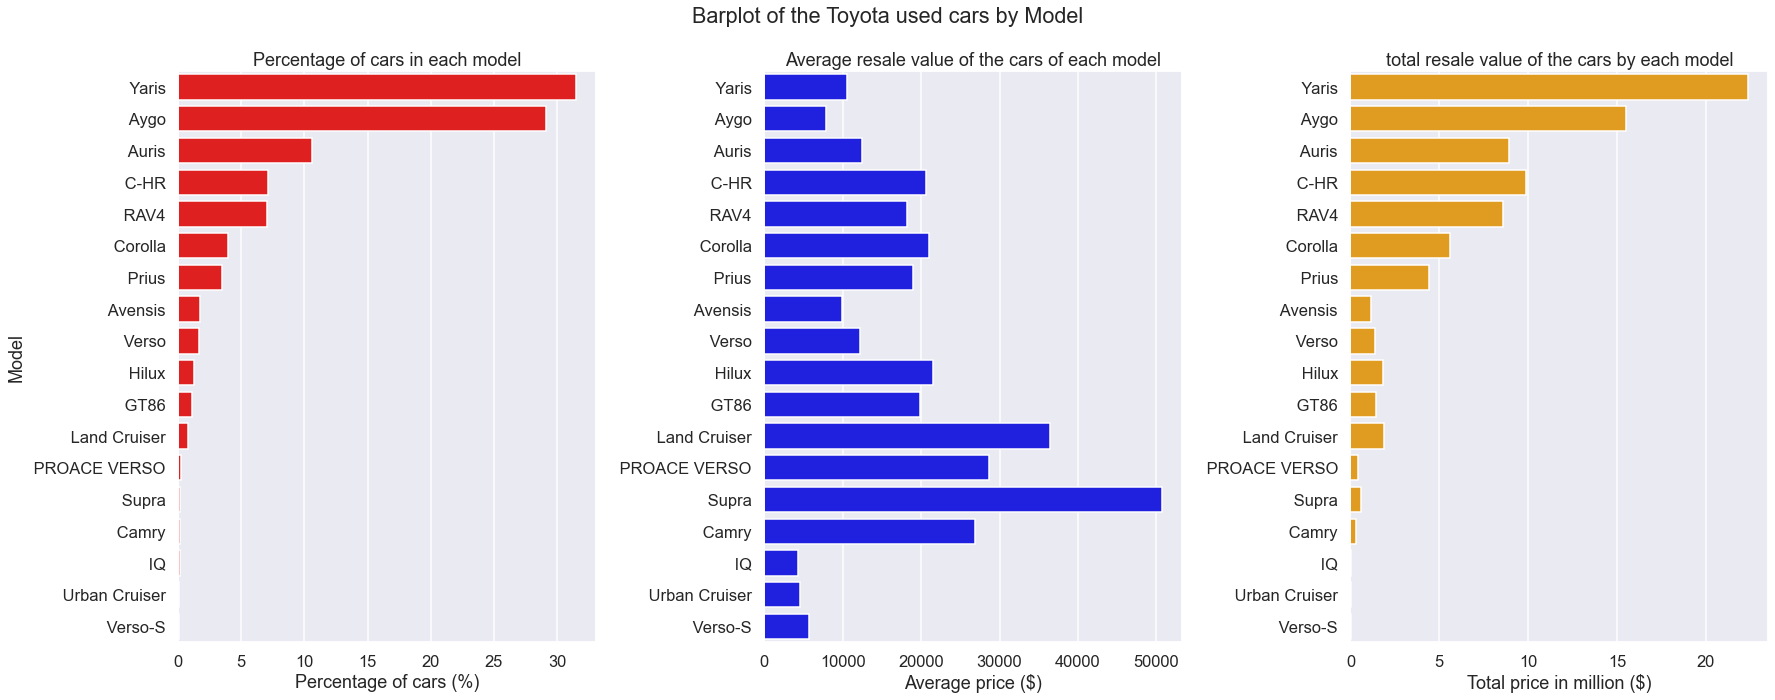

In [83]:
plt.figure(figsize=(25,10))
sns.set_context("talk")
sns.set_style("darkgrid")

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='red')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Model")



plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million ($)")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota used cars by Model")
plt.tight_layout()
plt.show()


### Observations
#### The top 5 selling car models in the dataset are Yaris (31%),Aygo (29%),Auris (11%),C-HR (7%),RAV4 (7%)
#### The average selling price of the top 5 selling car models are Yaris (10553 USD),Aygo (7905 USD),Auris (12507 USD),C-HR (20651 USD),RAV4 (18161 USD)
#### The total sale of the top 5 selling car models are Yaris (22 million USD),Aygo (15.5 million USD),Auris (8.9 million USD),C-HR (9.9 million USD),RAV4 (8.6 million USD)

### Barplot for percentages of the cars,Average and Total selling price of the cars by transmission

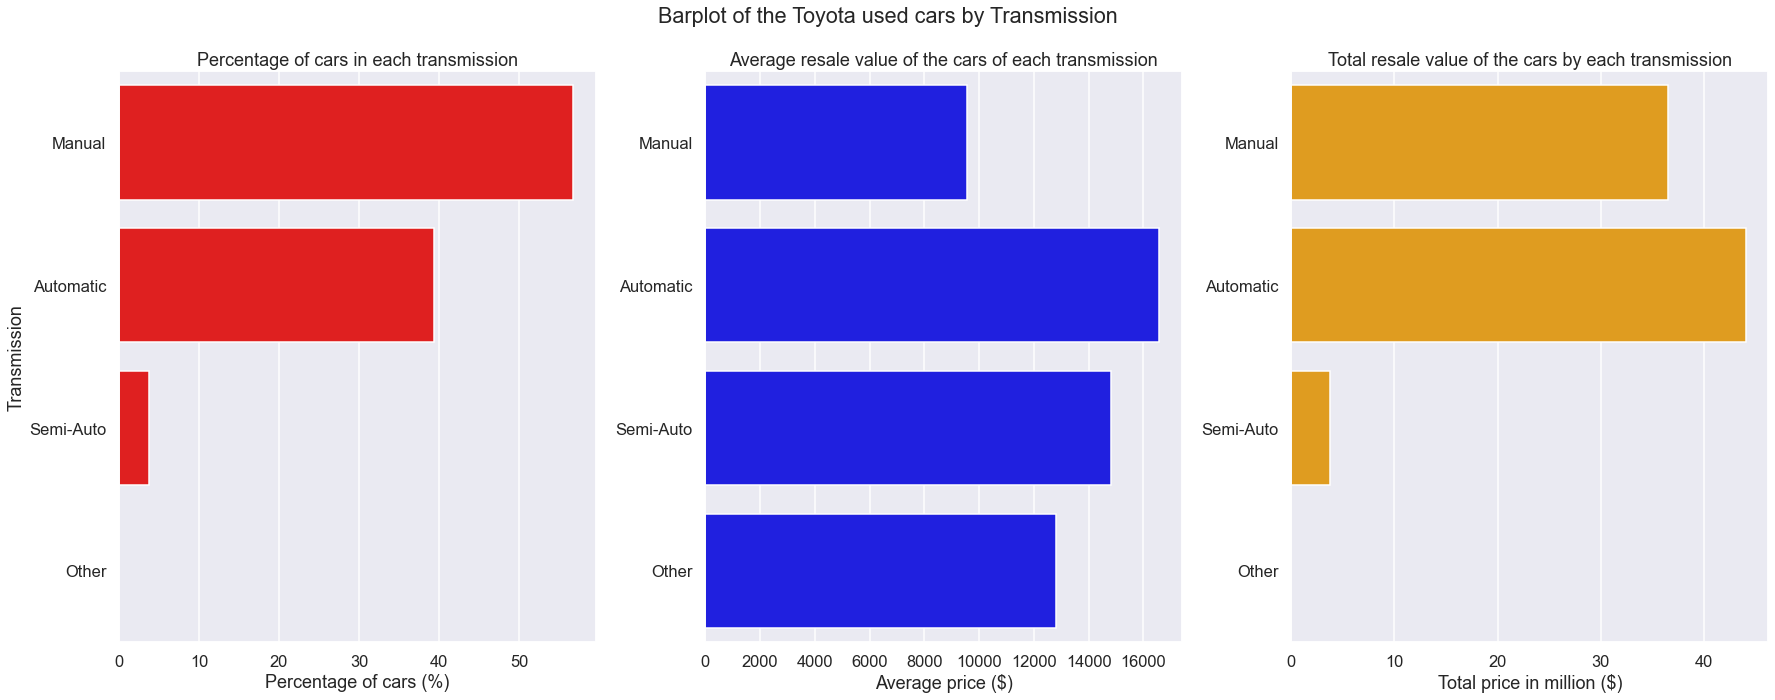

In [84]:
plt.figure(figsize=(25,10))
sns.set_context("talk")
sns.set_style("darkgrid")

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='red')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Transmission")



plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Total resale value of the cars by each transmission")
plt.xlabel("Total price in million ($)")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota used cars by Transmission")
plt.tight_layout()
plt.show()

### Observation
#### The top selling cars by transmission Manual(61%) ,Automatic (30%), Semi-Auto(7.5%) and Other (1.5%)
#### The average selling price of cars by transmission Manual(9551 USD) ,Automatic (16582 USD), Semi-Auto(14797 USD) and Other (12795 USD)
#### The total sale of cars by transmission Manual(36.5 million USD) ,Automatic (44 million USD), Semi-Auto(3.8 million USD) and Other's are negligible

### Barplot for percentages of the cars,Average and Total selling price of the cars by fuelType

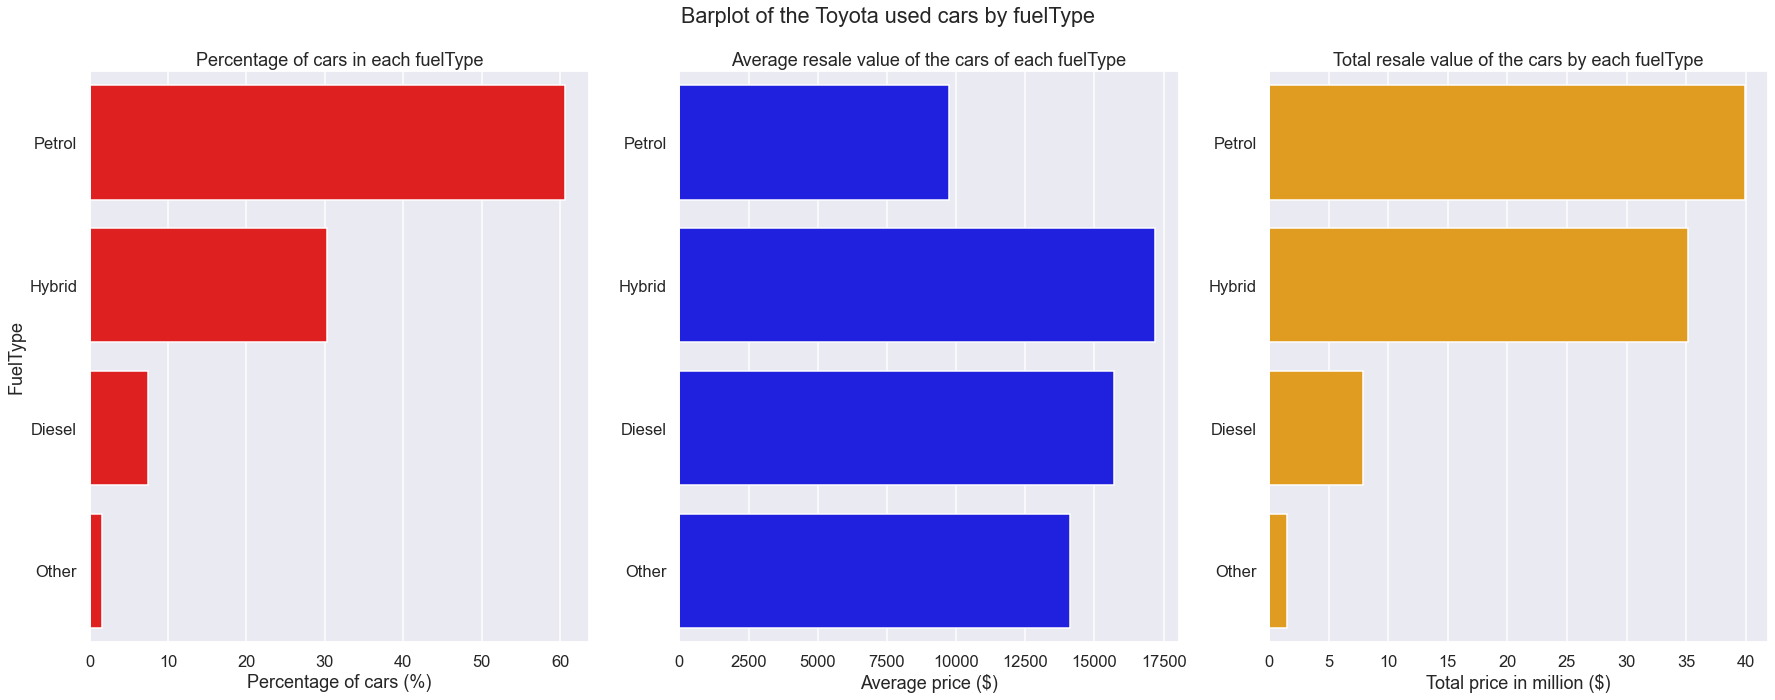

In [85]:
plt.figure(figsize=(25,10))
sns.set_context("talk")
sns.set_style("darkgrid")

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='red')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("FuelType")



plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Total resale value of the cars by each fuelType")
plt.xlabel("Total price in million ($)")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota used cars by fuelType")
plt.tight_layout()
plt.show()

### Observations
#### The top selling cars by fuelType Petrol(57%) ,Hybrid (39%), Diesel(4%) and Other's are negligible
#### The average selling price of cars by fuelType Petrol(9759 USD) ,Hybrid (17185 USD), Diesel(15697 USD) and Other (14121 USD)
#### The total sale of cars by fuelType Petrol(40 million USD) ,Hybrid (35 million USD), Diesel(8 million USD) and Other (1.5 million USD)